# Análise de Risco de Credito

A análise de risco de crédito é uma prática essencial no setor financeiro, utilizada por bancos, fintechs e demais instituições para avaliar a probabilidade de um cliente honrar ou não suas obrigações financeiras. Esse processo busca reduzir perdas, otimizar a concessão de crédito e garantir maior segurança nas operações.

**Objetivo:** Criar um modelo de Machine Learning que analise o risco de crédito dos clientes, auxiliando a instituição financeira a reduzir casos de inadimplência.

O dataset utilizado nesse projeto é o credit_data, uma base de dados adaptada do Kaggle e está disponivel neste repositorio

**Importação dos Dados**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
base_credit = pd.read_csv("credit_data.csv")

**Analise Exploratoria dos dados**

In [4]:
print("DIMENSÕES DO DATAFRAME:")
print(f"Linhas:{base_credit.shape[0]}")
print(f"Colunas:{base_credit.shape[1]}")

DIMENSÕES DO DATAFRAME:
Linhas:2000
Colunas:5


In [4]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


**Descrição das colunas**
- clientid: Identificador unico de cada cliente (irrelevante para o modelo e pode ser descartada)
- income: Valor da renda anual do cliente
- age: Idade do cliente
- loan: Valor do empréstimo
- default: Coluna que indica se o cliente pagou ou nao o emprestimo(0 = pagou e 1 = nao pagou)

A variavel alvo nesse caso será a coluna **default**

Resumo estatistico dos dados do dataset:

In [5]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


- Após essa analise inicial podemos ver que a coluna age possui valores negativos

Tipos de dados:

In [6]:
print(base_credit.dtypes)

clientid      int64
income      float64
age         float64
loan        float64
default       int64
dtype: object


Verificação de valores faltantes:

In [7]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

- Como podemos analisar a coluna age possui valores faltantes e negativos que deverão ser corrigidos

**Tratamento de dados**

Como foi verificado anteriormente, existem valores na coluna age que precisam ser corrigidos

Identificando os valores negativos:

In [5]:
base_credit[base_credit['age'] < 0 ]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


Como podemos ver existem 3 valores negativos na coluna age, vamos corrigir pois é impossível uma pessoa ter a idade negativa

O método aplicado para correção será substituir esses valores pela média total dos valores positivos da respectiva coluna

In [6]:
base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

Substituindo os negativos pela média dos valores positivos:

In [7]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [8]:
base_credit[base_credit['age'] < 0]

,clientid,income,age,loan,default


- Como podemos ver acima, não existem mais valores negativos

In [9]:
base_credit.loc[(base_credit['clientid'] == 16) | (base_credit['clientid'] == 22) | (base_credit['clientid'] == 27)]

,clientid,income,age,loan,default
15,16,50501.726689,40.92,3977.287432,0
21,22,32197.620701,40.92,4244.057136,0
26,27,63287.038908,40.92,9595.286289,0


Identificando os valores nulos:

In [10]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


Para correção desses valores será aplicado o mesmo método, substituindo os valores faltantes pela média da coluna age

In [11]:
base_credit["age"] = base_credit["age"].fillna(base_credit["age"].mean())

In [12]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


- Como podemos ver acima, não existem mais valores faltantes

**Visualização dos Dados**

Agora após a limpeza dos dados podemos ter uma breve análise visual 

Proporção entre Inadimplentes no Dataset:
default
0    0.8585
1    0.1415
Name: count, dtype: float64


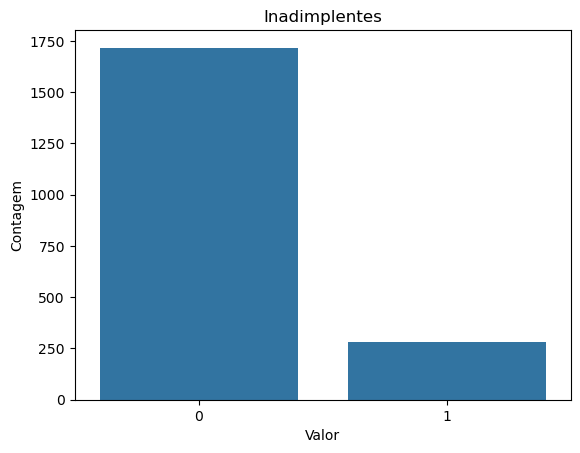

In [16]:
fig, ax = plt.subplots()
sns.countplot(x = base_credit['default']);
ax.set_title("Inadimplentes")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")

print("Proporção entre Inadimplentes no Dataset:")
print(base_credit['default'].value_counts() / base_credit.shape[0])

- Analisando o gráfico acima podemos ver que **85.85%** dos clientes pagam o empréstimo e **14.15%** dos clientes não pagam o empréstimo

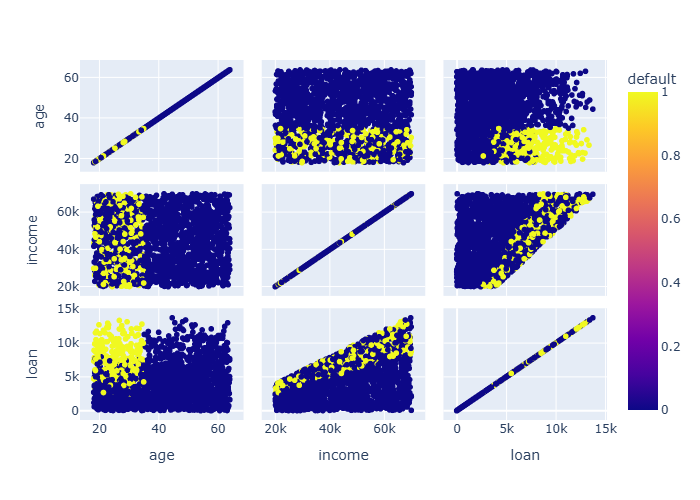

In [13]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = "default")
grafico.show(renderer="png")

- E com o gráfico acima podemos ver que as pessoas mais novas, em torno de 20 a 35 anos, tendem a não pagar suas dívidas

**Divisão dos atributos entre previsores e classe**

Temos que fazer essa divisão para que o modelo de Machine Learning consiga identificar os atributos previsores e o atributo a ser previsto

In [85]:
X_credit = base_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [86]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [87]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

- Como podemos observar acima, os valores estão fora de escala e isso pode ocasionar em um baixo desempenho do modelo de Machine Learning

Para resolver isso irei padronizar as variáveis numéricas utilizando o Standard Scaler:

In [88]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [89]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [90]:
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

- Como podemos ver acima, os dados agora estão todos na mesma escala

**Divisão das Bases em Treinamento e Teste**

Por fim irei separar a base entre treinamento e teste com a função train_test_split. Nesse caso irei usar 25% da base como teste

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

In [94]:
X_credit_treinamento.shape

(1500, 3)

In [95]:
y_credit_treinamento.shape

(1500,)

- Como podemos ver acima , irei usar 1500 registros para treinamento

## **Construção do Modelo**

Para a resolução deste problema , após alguns testes resolvi utilizar o algortimo SVM (Support Vector Machine) por apresentar bons resultados parar problemas desse tipo e por apresentar uma boa acuracia nesse em especifico

In [96]:
from sklearn.svm import SVC

Realizei alguns testes com as configurações do modelo e foram essas que mantive pelo equilibrio entre acurácia e tempo de treinamento, visando uma boa performance sem comprometer a eficiência computacional

In [97]:
svm_credit = SVC(kernel = 'rbf', random_state = 1, C = 2.0)
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(C=2.0, random_state=1)

Algoritmo treinado, hora de submeter aos testes para avaliar o desempenho

In [98]:
previsoes = svm_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [99]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.988

- Como podemos ver acima, foi atingido uma boa acurácia. Por fim irei gerar a matriz de confusão e o classification report para termos uma analise mais completa

0.988

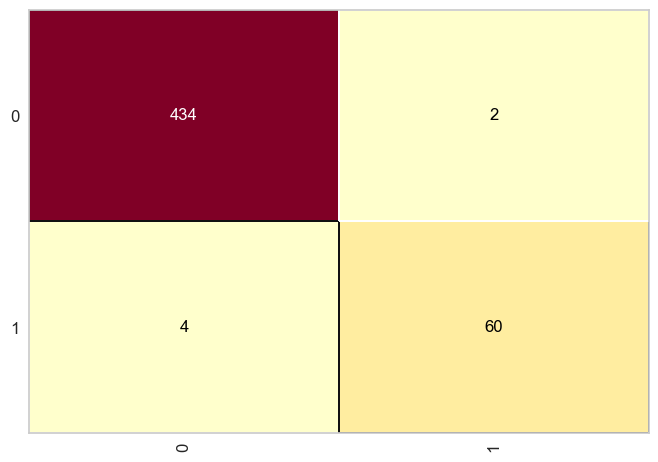

In [101]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [102]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



Após o processo de treinamento e validação, o algoritmo apresentou desempenho satisfatório, atingindo uma acurácia de 98.80% no problema em questão.